<a href="https://colab.research.google.com/github/justingardner/tutorials/blob/master/recurrence_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm as progressBar
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython import display
from functools import partial
from numpy.linalg import eig

Exercise 1:

Here, we are just going to play around with the time constant for a single neuron and see if we can get the neuron to act like an integrator. Note that
we are not using the close-form solution (exponential function) for the differential function for the membrane potential. Instead we are numerically integrating. We could do either for this linear differential equation, but in general, once you add non-linearities (for example the spike threshold), there is no closed-form solution, so numerical integration is the way to go. 

The simulation simulates 2 seconds of the neurons membrane potential (we are just going to ignore spiking and all that business) and we can see how the neuron behaves to a box function input (something like the ideal velocity burst coming from the PPRF.

100%|██████████| 1999/1999 [00:00<00:00, 23627.85it/s]


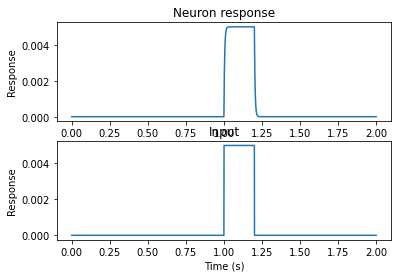

In [ ]:
# number of seconds to simulate for
simulationLength = 2;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#initial state - just start at 0,0
v0 = np.matrix([0]).transpose()

# time constant of units in seconds
tau = 0.005;

# u is the input. Here we just make it have a short pulse
# of activity and otherwise be 0.
pulseLen = 0.2;
u = np.matrix(np.zeros((nTimePoints,1)));
u[int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)

# a time vector, just so that we can plot the traces with real units.
t = np.matrix(range(nTimePoints))/sampleRate;
t = t.transpose();
# initialize array that will hold each state of the model neurons over time
nTimePoints = int(simulationLength*sampleRate)
v = np.matrix(np.zeros((nTimePoints,1)))

# set the initial state of the neurons
v[0] = v0;

# ok, here's the big computation. We will use the simplest possible way to
# numerically simulate the equations which is just to compute the derivative
# in small time steps and add it on to the current state and iterate.
# This is known as the "Euler method" and for simple equations performs
# just fine.
for iTimePoint in progressBar(range(1,nTimePoints)):
  # compute the derivative using the equation.
  # note the the dt is on the right hand side, because we want
  # to know what the dv is that we need to add to our current state v.
  dv = (1/tau) * dt * (-v[iTimePoint-1] + u[iTimePoint])
  # add the dv to v and also add in the inputs.
  v[iTimePoint] = v[iTimePoint-1] + dv ;

# Display our simulation
plt.figure();
# subplot that shows the neuron states
plt.subplot(2,1,1)
plt.plot(t,v)
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.title('Neuron response')
# subplot that shows the input states
plt.subplot(2,1,2)
plt.plot(t,u);
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.title(('Input'));

Exercise 2
Here's a two neuron circuit. You can connect the together the neurons with synaptic weights that you choose by setting the matrix W. 

Exercise 4:
(Wait to do this part until we get to it in the slides)
Set the initial conditions to different values and see what happens when you set the values to "impossible" ones - i.e. when v1 and v2 are not equal. You can do this in the code above for Exercise 2.

100%|██████████| 1999/1999 [00:00<00:00, 11122.73it/s]


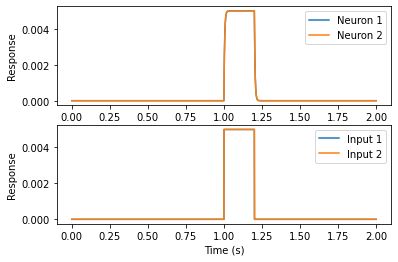

In [ ]:
# number of seconds to simulate for
simulationLength = 2;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#initial state - just start at 0,0
v0 = np.matrix([0, 0]).transpose()

# time constant of units in seconds
tau = 0.005;

# weight matrix, in this case each unit is independent
# ie there are no connections between the units and
# they will just respond as an exponential function with
# time constant tau to the inputs.
W = np.matrix([[0, 0],[0,0]]);

# u are the inputs. Here we just make them have a short pulse
# of activity and otherwise be 0.
pulseLen = 0.2;
u = np.matrix(np.zeros((2,nTimePoints)));
u[0,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[1,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)

# a time vector, just so that we can plot the traces with real units.
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model neurons over time
nTimePoints = int(simulationLength*sampleRate)
v = np.matrix(np.zeros((2,nTimePoints)))

# set the initial state of the neurons
v[:,0] = v0;

# ok, here's the big computation. We will use the simplest possible way to
# numerically simulate the equations which is just to compute the derivative
# in small time steps and add it on to the current state and iterate.
# This is known as the "Euler method" and for simple equations performs
# just fine.
for iTimePoint in progressBar(range(1,nTimePoints)):
  # compute the derivative
  dv = (1/tau) * dt * (-v[:,iTimePoint-1] + W @ v[:,iTimePoint-1]  + u[:,iTimePoint])
  # add the dv to v
  v[:,iTimePoint] = v[:,iTimePoint-1] + dv;

# Display our simulation
plt.figure();
# set these to display a particular portion of the trace that you are interested in.
startTime = 0; endTime = 2;
# subplot that shows the neuron states
plt.subplot(2,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],v[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
# subplot that shows the input states
plt.subplot(2,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

Exercise 3
Check the eigenvalues and eigenvectors from the simulation you ran above, do you get what you think you should be getting?

In [ ]:
# compute X
X = (1/tau) * np.matrix([[-1, 0],[0,-1]]) @ W

#display the mateix
print('State transition matrix:')
print(X)

# display the eigenvalues
eigenvalue,eigenvector=eig(X)
print('eigenvalue:', eigenvalue)

# it's also helpful to plot them as -1/eigenvalue, as this will show you the timeconstants
print('-1/eigenvalue:', -1/eigenvalue)

# Also look at the eigenvectors, this tells you the
# direction in the state space that is being integrated
# with those time constants
print('eigenvector 1:',eigenvector[:,0].transpose())
print('eigenvector 2:',eigenvector[:,1].transpose())

State transition matrix:
[[   0. -200.]
 [-200.    0.]]
eigenvalue: [ 200. -200.]
-1/eigenvalue: [-0.005  0.005]
eigenvector 1: [[ 0.70710678 -0.70710678]]
eigenvector 2: [[0.70710678 0.70710678]]


Exercise 5: 

Make a synaptic weight matrix that is a line attractor. Use this code to create a weight matrix that has one eigenvalue = 1 in a direction of your choice (the direction means that along that line the circuit will act like a line integrator. Thus if it is [2,1] then neuron 1 will be twice as active as neuron 2). Then go into the code above and set the weight matrix accordingly and see if it works.

In [ ]:
# choose a direction for our eigenvector
# this will be the direction of the line attractor
# i.e. the network will settle to where neuron 1 and
# neuron 2 have a ratio of the values here.
lineAttractorDirection = np.matrix([2,1])
# normalize to unit length (so that we get an eigenvalue of 1)
lineAttractorDirection = lineAttractorDirection / np.linalg.norm(lineAttractorDirection);

# remember the eigenvalue / eigenvector decomposition?
# it says that a square nxn matrix of full rank can
# be written as:
# A = QLQ-1
# where Q is a matrix with the columns filled with the eigenvectors
# and L is a diagonal martrix with the eigenvalues along the diagonal.
# If we further impose that A will be a symmetric matrix (which makes
# all the connections symmetric, then Q-1 = Q' i.e. the inverse of
# the eigenvector matrix is it's transpose.
# ok, with that linear algebra, then we can make a matrix that
# has the eigenvector we specified above, with an eigenvalue of 1,
# by just making a column matrix out of the u above by taking
# its transpose and then mulitplying it by the transpose of that
Q = lineAttractorDirection.transpose();
W = Q @ Q.transpose()
# print out the matrix that comes out of that
print('Desired connection matrix W:\n',W)
# Check the eigenvalues and eigenvectors of this matrix
# to the match what we asked for?
eigenvalue,eigenvector=eig(W)
print('eigenvalue:', eigenvalue)
print('Desired line attractor direction:',lineAttractorDirection)
print('eigenvector:',eigenvector.transpose()[0,:])

Desired connection matrix W:
 [[0.8 0.4]
 [0.4 0.2]]
eigenvalue: [1.00000000e+00 2.77555756e-17]
Desired line attractor direction: [[0.89442719 0.4472136 ]]
eigenvector: [[0.89442719 0.4472136 ]]


Exercise 6:
Set the input weights (controls which input goes to which neuron) and the synapitc weights to implement a network that can perform the Mante task.

100%|██████████| 2999/2999 [00:00<00:00, 8402.19it/s]


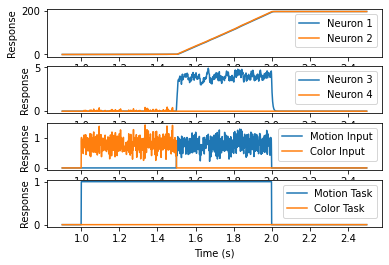

In [ ]:
# set to 1 for a color trial, and 0 for a motion trial
colorTrial = 0;

# number of seconds to simulate for
simulationLength = 3;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#initial state - just start with all 0s
x0 = np.matrix([0, 0, 0, 0]).transpose()

# some time constants
# tau is the intrinsic time constant of each neuron
tau = 0.005;

# weight matrix 
W = (1/tau)*np.matrix([[ -1,  1,  0,  1],
                        [  1, -1,  1,  0],
                        [  0,  0, -1,  0],
                        [  0,  0,  0, -1]])

# input weight matrix, each row is for a neuron
# each column is for one of the inputs as described below
WInput = np.matrix([[  0,  0,  0,  0],
                    [  0,  0,  0,  0],
                    [  1,  0,  0,  -1],
                    [  0,  1,  -1,  0]])

# define inputs. 
# Where u0 is motion stimulus input (will just make this)
# Where u1 is the color stimulus input
# Where u2 is the motion task input (1 for motion task, 0 otherwise)
# Where u3 is the color task input (1 for color task, 0 otherwise)
u = np.matrix(np.zeros((4,nTimePoints)));
trialLen = 1;
numSamplesInTrial = int((1+trialLen)*sampleRate)-int(1*sampleRate);
u[0,int((1+trialLen/2)*sampleRate):int((1+trialLen)*sampleRate)] = np.random.normal(loc=0.8,scale=0.2,size=(1,int(numSamplesInTrial/2)));
u[1,int(1*sampleRate):int((1+trialLen/2)*sampleRate)] = np.random.normal(loc=0.8,scale=0.2,size=(1,int(numSamplesInTrial/2)));

if (colorTrial):
  # for a color trial
  u[2,int(1*sampleRate):int((1+trialLen)*sampleRate)] = 0
  u[3,int(1*sampleRate):int((1+trialLen)*sampleRate)] = 1
else:
  # for a motion trial
  u[2,int(1*sampleRate):int((1+trialLen)*sampleRate)] = 1
  u[3,int(1*sampleRate):int((1+trialLen)*sampleRate)] = 0


# a time vector, just so that we can plot the traces with real units.
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model neurons over time
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((4,nTimePoints)))

# compute model using Euler's method
for iTimePoint in progressBar(range(1,nTimePoints)):
  dx = W @ x[:,iTimePoint-1] * dt
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx + WInput @ u[:,iTimePoint];
  # threshold the units
  x[:,iTimePoint] = np.multiply((x[:,iTimePoint]>0),x[:,iTimePoint])

# Display figure
plt.figure();
startTime = 0.9; endTime = 2.5;
plt.subplot(4,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[0:2,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(4,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[2:4,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 3','Neuron 4'))
plt.subplot(4,1,3)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[0:2,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Motion Input','Color Input'))
plt.subplot(4,1,4)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[2:4,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Motion Task','Color Task'))
